# Notebook - Analisi della qualità del vino 

Il dataset sulla qualità del vino contiene informazioni su varie proprietà fisico-chimiche dei vini. É associato un set di dati alla sua varietà di colore: vino rosso e vino bianco. Ad ogni vino è assegnata un'etichetta riguardante la qualità.

![](http://pasticceriedelite.it/wp-content/uploads/2021/02/rossibianchi.jpg)

### Indice:
1. <a href="http://localhost:8888/notebooks/Wine%20Analysis.ipynb#1---Manipolazioni-dei-Dati">Manipolazione dei Dati</a> 
2. <a href="http://localhost:8888/notebooks/Wine%20Analysis.ipynb#Statistica-Descrittiva-e-Analisi-Esplorativa-tramite-Tecniche-di-Visualizzazione">Analisi Statistica Descrittiva e Visualizzazione</a>  
3. <a href="http://localhost:8888/notebooks/Wine%20Analysis.ipynb#Machine-learnging">Machine Learning</a>

### Import delle librerie necessarie

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Caricamento dei dataset <a href="https://archive.ics.uci.edu/ml/datasets/Wine+Quality" target="_blank">LINK</a>

In [3]:
# utilizzo il separatore ';'
df_white_wine = pd.read_csv('./winequality-white.csv', sep=';')
df_red_wine = pd.read_csv('./winequality-red.csv', sep=';')

## 1 - Manipolazioni dei dati

Una prima vista dei dataset

In [4]:
print('Dataset vini rossi:', df_red_wine.shape)
df_red_wine

Dataset vini rossi: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
print('Dataset vini bianchi:', df_red_wine.shape)
df_white_wine

Dataset vini bianchi: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [6]:
df_red_wine['wine color'] = 'red'   
df_white_wine['wine color'] = 'white'

### Modifica dei dataset aggiungendo la colonna relativa al colore del vino

In [7]:
print('Verifica della colonna del colore per vini rossi:')
df_red_wine.head()

Verifica della colonna del colore per vini rossi:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [8]:
print('Verifica della colonna del colore per vini bianchi:')
df_white_wine.head()

Verifica della colonna del colore per vini bianchi:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


### Verifica preliminare di righe e colonna per unire i due dataset

In [9]:
print(df_red_wine.count())
print()
print(df_white_wine.count())

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
wine color              1599
dtype: int64

fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
wine color              4898
dtype: int64


***

*I vini rossi sono 1599 mentre i vini bianchi sono 4898. Da una prima analisi notiamo che non ci sono anomalie su valori nulli. Inoltre, i dataset hanno le stesse colonne quindi sono concatenabili*

### Concatenamento dei due dataset in un unico dataset (orizzontalmente)

In [10]:
df_wines = pd.concat([df_red_wine, df_white_wine], axis=0)

# mescolamento delle righe (axis = 0), ritorna tutte le righe (frac = 1)
df_wines = df_wines.sample(frac=1, axis=0)

# reset degli indici, elimina la colonna degli indici precedente (drop=true)
# lavora sullo stesso DF (inplace=true)
df_wines.reset_index(inplace=True, drop=True)

# verifichiamo le operazioni
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine color            6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


***

*Si ottengono 6497 entries con indici che vanno da 0 a 6496*

In [11]:
df_wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine color
6492,9.2,0.54,0.31,2.30,0.112,11.0,38.0,0.99699,3.24,0.56,10.9,5,red
6493,6.2,0.28,0.51,7.90,0.056,49.0,206.0,0.99560,3.18,0.52,9.4,5,white
6494,7.1,0.23,0.35,16.50,0.040,60.0,171.0,0.99900,3.16,0.59,9.1,6,white
6495,7.2,0.18,0.41,1.20,0.048,41.0,97.0,0.99190,3.14,0.45,10.4,5,white
6496,7.4,0.16,0.31,6.85,0.059,31.0,131.0,0.99520,3.29,0.34,9.7,5,white


***

*Notiamo come gli indici vengono resettati in modo predefinito dopo la concatenazione ed il mescolamento*

### Verifica dei valori null sul nuovo dataset

In [12]:
df_wines.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
wine color              False
dtype: bool

***

*Non ci sono valori mancanti/nulli e tutte le colonne (al netto della colonna descrittive aggiunta: colore) hanno un valore numerico*

### Aggiunta della colonna testuale descrittiva sulla qualità del vino

In [13]:
# verifica valori sulle qualità del vino

unique_quality = df_wines['quality'].unique();

print('Possibili valori (in ordine crescente) della qualità del vino:', np.sort(unique_quality))
print()
print('Minimo valore della qualità del vino:', unique_quality.min())
print()      
print('Massimo valore della qualità del vino:', unique_quality.max())

Possibili valori (in ordine crescente) della qualità del vino: [3 4 5 6 7 8 9]

Minimo valore della qualità del vino: 3

Massimo valore della qualità del vino: 9


In base ai risultati della precedente istruzione si utilizzano tre metodi diversi per aggiungere la nuova colonna e viene confrontata l'efficienza tramite il profiling del tempo

***
*Analisi performance funzione "cut":*

In [13]:
%%timeit
step = (0, 5, 7, 9)
labels = ['low', 'medium', 'high']
df_wines['quality description'] = pd.cut(x = df_wines['quality'], bins = step, labels = labels)

884 µs ± 21.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


***
*Analisi performance funzione "apply":*

In [20]:
%%timeit
df_wines['quality description'] = df_wines['quality'].apply(
    lambda value: 'low' if value <= 5 
    else 'medium' if value <= 7 
    else 'high')

1.09 ms ± 77.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


***
*Analisi performance funzione "for loop":*

In [14]:
%%timeit
newRow=[]
for row in df_wines['quality']:
    if (row<=5):
        val='low'
    elif (row <= 7):
        val='medium'
    else:
        val='high'
    newRow.append(val)
df_wines['quality description'] = newRow

1.25 ms ± 30.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


***

**Controlliamo i risultati:**

In [15]:
print(df_wines.loc[df_wines['quality'] <= 5, ['quality','quality description']].head())
print()
print(df_wines.loc[df_wines['quality'].between(6, 7),['quality','quality description']].head())
print()
print(df_wines.loc[df_wines['quality'] > 7,['quality','quality description']].head())


    quality quality description
6         5                 low
7         5                 low
9         5                 low
12        5                 low
14        5                 low

   quality quality description
0        7              medium
1        6              medium
2        6              medium
3        6              medium
4        6              medium

     quality quality description
10         8                high
36         8                high
89         8                high
110        8                high
139        8                high


### Aggiunta della colonna sulle KCAL

L’alcol sviluppa circa 7 calorie per grammo, ed ha un peso specifico di 79 quindi pesa 0,79 kg/litro. Per cui:
un litro di vino con 12° di gradazione contiene 120 ml di alcol, pari a 120×0,79=94,8 grammi. 95×7=**665 kcal**

Lo zucchero nel vino, ha un apporto calorico di 4 kcal/grammo. Quindi un vino con 2.4 g di zucchero contiene 2.4x4=**9.6 kcal**

In totale un litro del vino in questione conterrà 665+9.6=**674.6 kcal** 

<a href="https://www.quattrocalici.it/articoli/quante-calorie-nel-bicchiere-di-vino/" target="_blank">fonte</a>

***
*Analisi performance versione "ufunc":*

In [44]:
%%timeit
kcal_alcohol = ((df_wines['alcohol'] * 10) * 0.79) * 7
kcal_sugar = df_wines['residual sugar'] * 4
df_wines['kcal'] = round(kcal_alcohol + kcal_sugar)

472 µs ± 19.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


***
*Analisi performance versione "eval":*

In [25]:
%timeit df_wines.eval('kcal = (alcohol * 10 * 0.79 * 7) + (`residual sugar` * 4)', inplace=True)

2.49 ms ± 139 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


***
*Analisi performance versione "apply":*

In [23]:
%%timeit
def calculateKcal(alcohol, sugar):
    kcal_alcohol = alcohol * 10 * 0.79 * 7
    kcal_sugar = sugar * 4
    return round(kcal_alcohol + kcal_sugar)

df_wines['kcal'] = df_wines[['alcohol','residual sugar']].apply(lambda val: calculateKcal(val['alcohol'], val['residual sugar']), axis=1)


85.7 ms ± 1.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


***
*Analisi performance versione "for loop":*

In [16]:
%%timeit
newRow=[]
for rowNumer in df_wines.index:
    kcal_alcohol = df_wines['alcohol'][rowNumer] * 10 * 0.79 * 7
    kcal_sugar = df_wines['residual sugar'][rowNumer] * 4
    newRow.append(round(kcal_alcohol + kcal_sugar))
                  
df_wines['kcal'] = newRow                  

80.4 ms ± 5.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
print('Verifica della colonna aggiunta:')
df_wines.head()

Verifica della colonna aggiunta:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine color,quality description,kcal
0,6.2,0.20,0.33,5.4,0.028,21.0,75.0,0.99012,3.36,0.41,13.5,7,white,medium,768
1,7.1,0.18,0.32,12.2,0.048,36.0,125.0,0.99670,2.92,0.54,9.4,6,white,medium,569
2,7.7,0.29,0.48,2.3,0.049,36.0,178.0,0.99310,3.17,0.64,10.6,6,white,medium,595
3,7.4,0.26,0.43,6.0,0.022,22.0,125.0,0.99280,3.13,0.55,11.5,6,white,medium,660
4,8.6,0.16,0.38,3.4,0.040,41.0,143.0,0.99320,2.95,0.39,10.2,6,white,medium,578


## Statistica Descrittiva e Analisi Esplorativa tramite Tecniche di Visualizzazione

### Attributi e proprietà del dataset:

* **Fixed Acidity**: Quantità di acido non volatile (non evapora facilmente) nel vino. La riduzione significativa di questa componente potrebbe portare a vini dal sapore piatto.

* **Volatile Acidity**: Indica la quantità di acido acetico nel vino. Un eccesso di questa compoenente porta a un sapore sgradevole.

* **Citric Acid**: Indica la quantità di acido citrico nel vino. Questa componente presente in piccole quantità conferisce freschezza al vino.

* **Residual Sugar**: Indica la quantità di zucchero rimasta nel vino al termine del processo di fermentazione. É raro trovare vini con meno di 1 grammo/litro.

* **Chlorides**: Indica la quantità di sale nel vino.

* **Free Sulfur Dioxide**: Indica la quantità di anidride solforosa in forma libera (che non si lega). Eccessive quantità potrebbero fornire un odore pungente.

* **Total Sulfur Dioxide**: misura la quantità totale di anidride solforosa nel vino. Questa sostanza chimica funziona come un agente antiossidante e antimicrobico.

* **Density**: Indica la misura della conversione dello zucchero in alcol. Vini più dolci hanno una densità maggiore.

* **PH**: Indica quanto è acido o basico un vino su una scala da 0 (molto acido) a 14 (molto basico). La maggior parte dei vini ha un pH compreso tra 2,9 e 3,9 e sono quindi acidi. La *Fixed Acidity* contribuisce alla variazione di PH dei vini.

* **Sulphates**: Indica la quantità di solfato di potassio nel vino. Sono collegati al processo di fermentazione e influenzano l'aroma e il sapore del vino.

* **Alcohol**: Conversione dello zucchero durante il processo di fermentazione. Indica la gradazione alcolica. Misurato in percentuale.

* **Quality**: Indica la qualità del vino, che va da 1 a 9. Più alto è il valore, migliore è il vino.

* **Wine Color**: Attributo introdotto che indica il colore del vino. Un vino può essere "rosso" o "bianco".

* **Quality Description**: Attributo derivato dall'attributo *Quality*. Raggruppato in tre segmenti qualitativi: low, medium e high. I vini con un punteggio di qualità di 3, 4 e 5 sono di bassa qualità, quelli con un punteggio di 6 e 7 sono di media qualità e quelli superiori a 7 sono di alta qualità.

* **kcal**: Attributo derivato dagli attributi *Alcohol* e *Residual Sugar*. Indica le kcal/l possedute dal vino.

### Analisi numerica dei vini in base colore

In [150]:
pd.set_option("display.max_columns", None)

rs = round(df_wines[df_wines['wine color'] == 'red'].describe(),2).T
ws = round(df_wines[df_wines['wine color'] == 'white'].describe(),2).T
pd.concat([rs, ws], axis=1, keys=['Red Wine Stats', 'White Wine Stats'])

Red Wine Stats                                         \
                              count    mean    std     min     25%     50%   
fixed acidity                1599.0    8.32   1.74    4.60    7.10    7.90   
volatile acidity             1599.0    0.53   0.18    0.12    0.39    0.52   
citric acid                  1599.0    0.27   0.19    0.00    0.09    0.26   
residual sugar               1599.0    2.54   1.41    0.90    1.90    2.20   
chlorides                    1599.0    0.09   0.05    0.01    0.07    0.08   
free sulfur dioxide          1599.0   15.87  10.46    1.00    7.00   14.00   
total sulfur dioxide         1599.0   46.47  32.90    6.00   22.00   38.00   
density                      1599.0    1.00   0.00    0.99    1.00    1.00   
pH                           1599.0    3.31   0.15    2.74    3.21    3.31   
sulphates                    1599.0    0.66   0.17    0.33    0.55    0.62   
alcohol                      1599.0   10.42   1.07    8.40    9.50   10.20   
quality                      1599.0    5.64   0.81    3.00    5.00    6.00   
kcal                         1599.0  586.57  59.44  472.00  536.00  572.00   

                                     White Wine Stats                         \
                         75%     max            count    mean    std     min   
fixed acidity           9.20   15.90           4898.0    6.85   0.84    3.80   
volatile acidity        0.64    1.58           4898.0    0.28   0.10    0.08   
citric acid             0.42    1.00           4898.0    0.33   0.12    0.00   
residual sugar          2.60   15.50           4898.0    6.39   5.07    0.60   
chlorides               0.09    0.61           4898.0    0.05   0.02    0.01   
free sulfur dioxide    21.00   72.00           4898.0   35.31  17.01    2.00   
total sulfur dioxide   62.00  289.00           4898.0  138.36  42.50    9.00   
density                 1.00    1.00           4898.0    0.99   0.00    0.99   
pH                      3.40    4.01           4898.0    3.19   0.15    2.72   
sulphates               0.73    2.00           4898.0    0.49   0.11    0.22   
alcohol                11.10   14.90           4898.0   10.51   1.23    8.00   
quality                 6.00    8.00           4898.0    5.88   0.89    3.00   
kcal                  623.00  854.00           4898.0  607.01  61.64  446.00   

                                                      
                         25%     50%     75%     max  
fixed acidity           6.30    6.80    7.30   14.20  
volatile acidity        0.21    0.26    0.32    1.10  
citric acid             0.27    0.32    0.39    1.66  
residual sugar          1.70    5.20    9.90   65.80  
chlorides               0.04    0.04    0.05    0.35  
free sulfur dioxide    23.00   34.00   46.00  289.00  
total sulfur dioxide  108.00  134.00  167.00  440.00  
density                 0.99    0.99    1.00    1.04  
pH                      3.09    3.18    3.28    3.82  
sulphates               0.41    0.47    0.55    1.08  
alcohol                 9.50   10.40   11.40   14.20  
quality                 5.00    6.00    6.00    9.00  
kcal                  558.00  594.00  644.00  910.00

### Analisi numerica dei vini in base alla qualità

In [190]:
pd.set_option("display.max_columns", None)

ls = round(df_wines[df_wines['quality description'] == 'low'].describe(),2).T
ms = round(df_wines[df_wines['quality description'] == 'medium'].describe(),2).T
hs = round(df_wines[df_wines['quality description'] == 'high'].describe(),2).T
pd.concat([ls, ms, hs], axis=1, keys=['Low Quality', 'Medium Quality', 'High Quality'])

Low Quality                                         \
                           count    mean    std     min     25%     50%   
fixed acidity             2384.0    7.33   1.27    4.20    6.50    7.10   
volatile acidity          2384.0    0.40   0.19    0.10    0.26    0.34   
citric acid               2384.0    0.30   0.16    0.00    0.21    0.30   
residual sugar            2384.0    5.65   4.92    0.60    1.80    2.90   
chlorides                 2384.0    0.06   0.04    0.01    0.04    0.05   
free sulfur dioxide       2384.0   29.48  19.84    2.00   14.00   26.00   
total sulfur dioxide      2384.0  119.28  61.89    6.00   68.00  124.00   
density                   2384.0    1.00   0.00    0.99    0.99    1.00   
pH                        2384.0    3.21   0.16    2.74    3.11    3.20   
sulphates                 2384.0    0.52   0.14    0.25    0.44    0.50   
alcohol                   2384.0    9.87   0.84    8.00    9.30    9.60   
quality                   2384.0    4.88   0.36    3.00    5.00    5.00   
kcal                      2384.0  568.60  43.86  446.00  537.00  560.00   

                                     Medium Quality                         \
                         75%     max          count    mean    std     min   
fixed acidity           7.80   15.90         3915.0    7.16   1.31    3.80   
volatile acidity        0.50    1.58         3915.0    0.31   0.14    0.08   
citric acid             0.40    1.00         3915.0    0.33   0.13    0.00   
residual sugar          8.52   23.50         3915.0    5.32   4.68    0.70   
chlorides               0.08    0.61         3915.0    0.05   0.03    0.01   
free sulfur dioxide    42.00  289.00         3915.0   30.96  16.33    1.00   
total sulfur dioxide  167.00  440.00         3915.0  113.51  53.57    6.00   
density                 1.00    1.00         3915.0    0.99   0.00    0.99   
pH                      3.31    3.90         3915.0    3.22   0.16    2.72   
sulphates               0.58    2.00         3915.0    0.54   0.15    0.22   
alcohol                10.40   14.90         3915.0   10.81   1.20    8.40   
quality                 5.00    5.00         3915.0    6.28   0.45    6.00   
kcal                  590.00  854.00         3915.0  618.97  61.33  472.00   

                                                     High Quality          \
                         25%     50%     75%     max        count    mean   
fixed acidity           6.40    6.90    7.60   15.60        198.0    6.85   
volatile acidity        0.21    0.27    0.36    1.04        198.0    0.29   
citric acid             0.26    0.31    0.39    1.66        198.0    0.33   
residual sugar          1.80    3.00    7.90   65.80        198.0    5.35   
chlorides               0.04    0.04    0.06    0.42        198.0    0.04   
free sulfur dioxide    19.00   29.00   41.00  112.00        198.0   34.51   
total sulfur dioxide   81.00  116.00  150.00  294.00        198.0  117.48   
density                 0.99    0.99    1.00    1.04        198.0    0.99   
pH                      3.11    3.21    3.33    4.01        198.0    3.23   
sulphates               0.43    0.51    0.61    1.95        198.0    0.51   
alcohol                 9.80   10.80   11.70   14.20        198.0   11.69   
quality                 6.00    6.00    7.00    7.00        198.0    8.03   
kcal                  569.00  613.00  663.00  910.00        198.0  667.94   

                                                                     
                        std     min     25%     50%     75%     max  
fixed acidity          1.14    3.90    6.20    6.80    7.30   12.60  
volatile acidity       0.12    0.12    0.21    0.28    0.35    0.85  
citric acid            0.10    0.03    0.28    0.32    0.37    0.74  
residual sugar         4.16    0.80    2.00    4.05    7.57   14.80  
chlorides              0.02    0.01    0.03    0.04    0.04    0.12  
free sulfur dioxide   17.08    3.00   24.00   34.00   43.00  105.00  
total su

### Distribuzione qualità dei vini

Conteggio dei valori univoci sulla qualità del vino:
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Media dei valori della qualità del vino: 5.82


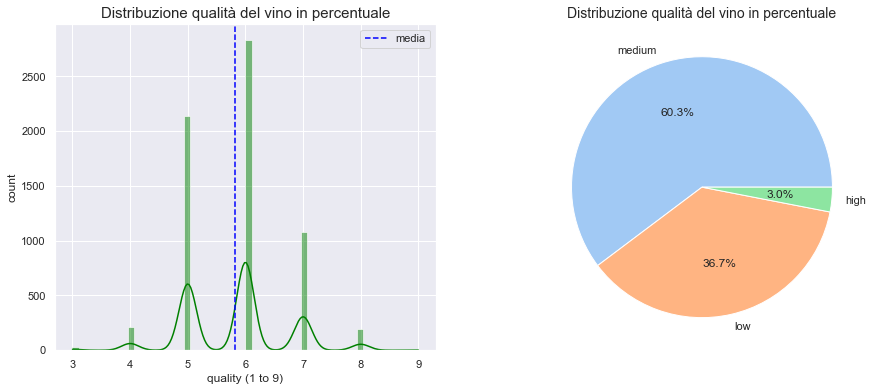

In [179]:
quality = df_wines['quality']
count_quality = quality.value_counts()
mean_quality = round(quality.mean(),2)

print('Conteggio dei valori univoci sulla qualità del vino:')
print(count_quality)
print()

print('Media dei valori della qualità del vino:', mean_quality)


fig, ax = plt.subplots(1,2, figsize=(15, 6), squeeze=False)

bar = ax[0][0]
sns.histplot(quality, color='green', ax=bar, kde=True)
bar.axvline(mean_quality, linestyle='dashed', label='media', color='blue')
bar.legend(loc='upper right')
bar.set_xlabel('quality (1 to 9)')
bar.set_ylabel('count')
bar.set_title('Distribuzione qualità del vino in percentuale', fontsize=15)

count_quality_desc = df_wines['quality description'].value_counts()
label_quality_desc = count_quality_desc.index.values
pie = ax[0,1]
pie.set_title('Distribuzione qualità del vino in percentuale', fontsize=14)
colors = sns.color_palette('pastel')[0:5]
pie.pie(count_quality_desc, autopct="%1.1f%%", colors=colors, labels = label_quality_desc)
#pie.legend(labels=label_quality_desc, loc="upper right", fontsize=10);

plt.show()

***

*Si noti che la maggior parte dei vini ha una qualità intorno al 6, per la precisione la media è di 5.82. La maggior parte dei vini quindi ha una qualità media, buona parte ha una qualità bassa e solo una minima parte ha una qualità elevata.*

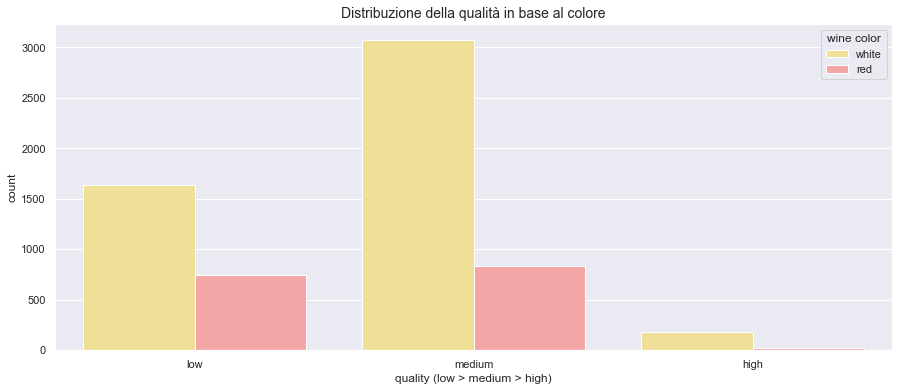

In [183]:
palette_red_white={"red": "#FF9999", "white": "#FFE888"}

fig, ax = plt.subplots(1, 1, figsize=(15, 6))
ax.set_title('Distribuzione della qualità in base al colore', fontsize=14)
cp = sns.countplot(x="quality description", hue="wine color",  data=df_wines, palette=palette_red_white, ax=ax)
cp.set_xlabel('quality (low > medium > high)')

plt.show()

***

*La differenza sulla qualità, in base al colore dei vini, risulta essere che nei vini bianchi sono distributi in maggioranza vini di media qualità, mentre in quelli di colore rosso la differenza tra vini di qualità bassa e media è minima*

### Verifica delle potenziali correlazioni tra i vari attributi del dataset

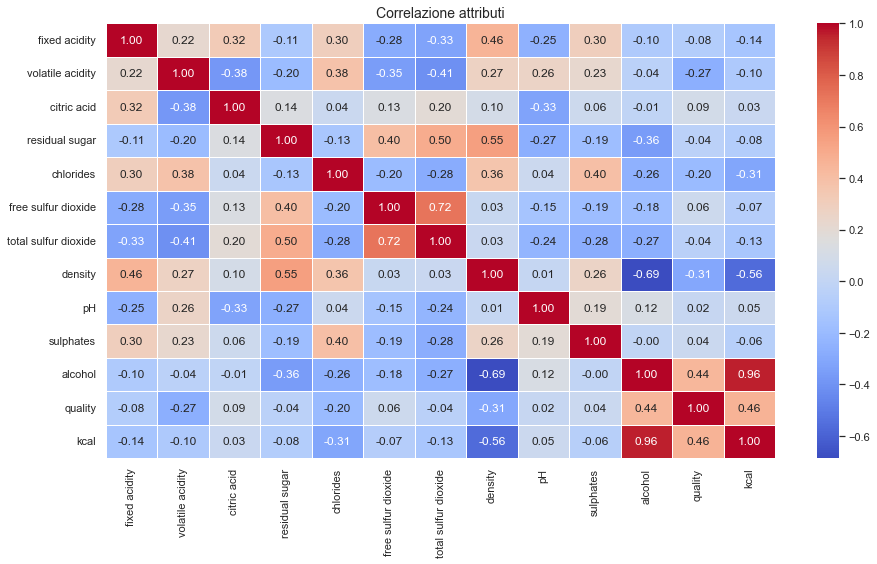

Riportiamo i valori della correlazione dei varti attributi con la qualità in forma testuale:


quality                 1.000000
kcal                    0.463363
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

In [178]:
plt.figure(figsize = (15,8))
corr = df_wines.corr()
ax = sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='1.2f', linewidths=1)
ax.set_title('Correlazione attributi', fontsize=14)

plt.show()

print('Riportiamo i valori della correlazione dei varti attributi con la qualità in forma testuale:')
df_wines.corr()['quality'].sort_values(ascending=False)

### Analisi  del rapporto attributi / qualità

Analisi grafica

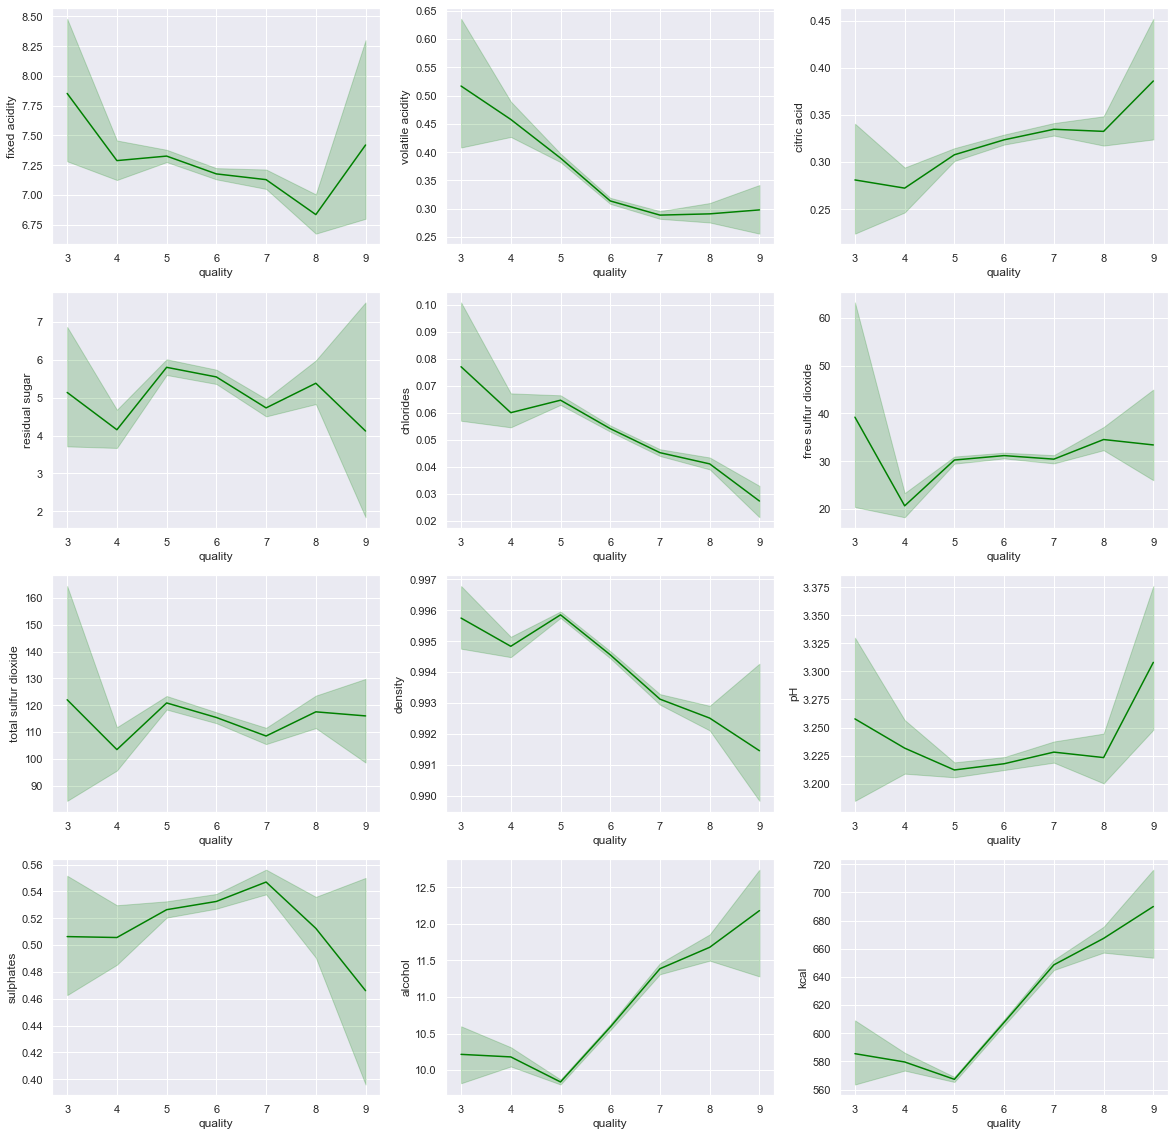

In [34]:
cols = 3
rows = 4
fig, ax = plt.subplots(ncols=cols, nrows=rows, figsize=(20,20))

subset_columns = df_wines.loc[:, df_wines.columns != 'quality'].select_dtypes(np.number).columns

counter=0
for i in range(rows):
    for j in range(cols):
        sns.lineplot(x='quality', y=subset_columns[counter], data=df_wines, markers=True, ax=ax[i][j], color='green')
        counter+=1
        if counter==len(subset_columns):
            break
            
plt.show()            

Analisi numerica

In [33]:
df_wines.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,kcal
quality,,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000,585.466667
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093,579.569444
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783,567.250234
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553,607.702045
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006,648.580167
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756,667.367876
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000,690.000000


***

*Abbiamo una visuale su quali attributi influiscono positivamente/negativamente sulla qualità*

Come ad esempio:
* Alcohol (**positivamente**)
* Kcal (**positivamente**)
* Citric Acid (**positivamente**)
* Chlorides (**negativamente**)
* Volatile Acidity (**negativamente**)
* Density (**negativamente**)

**Verifica rapporto *Kcal-Alcohol-Qualità* (tridimensionalmente)**

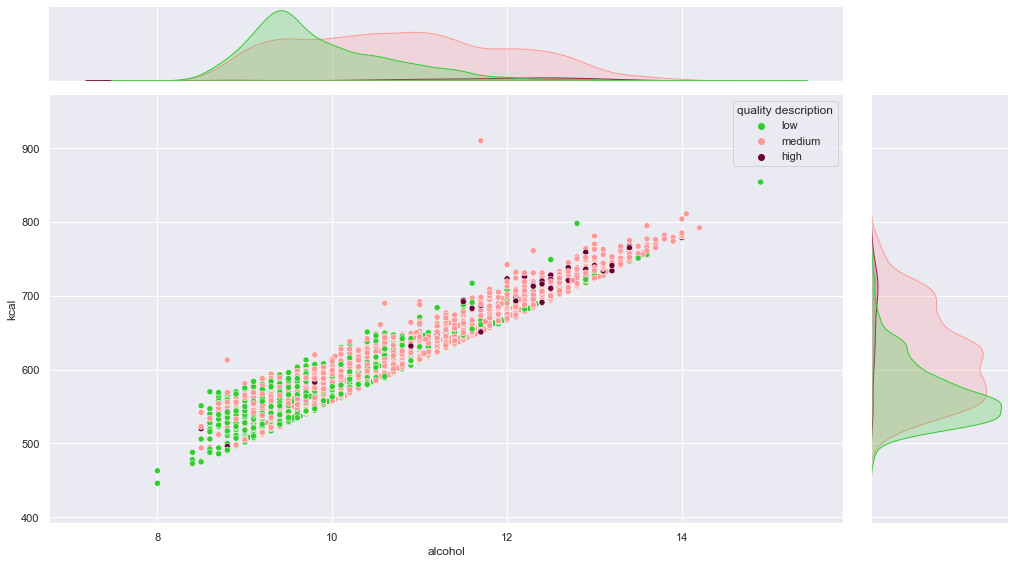

In [138]:
df_wines['quality description'] = pd.Categorical(df_wines['quality description'], 
                                             categories=['low', 'medium', 'high'])

palette={"low": "#33cc33", "medium": "#ff9999", "high": "#660033"}

fig = sns.jointplot(x='alcohol', y='kcal', height=8, ratio=5, data=df_wines, hue="quality description", palette=palette)
fig.fig.set_figwidth(15)
fig.fig.set_figheight(8)
plt.show()

***
*Mettendo le tre proprietà in relazione si evince che in un vino di qualità c'è maggiore quantità di alcohol e maggiore è il contributo calorico, quindi Alcohol e Kcal influenzano positivamente la qualità del vino. Quindi, per un vino di buona qualità il livello ottimale di alcohol sarebbe compreso tra 11 e 14. Un vino con una gradazione alcolica più elevata avrà un corpo più pieno e ricco.*

**Verifica rapporto *Acido Citrico / Qualità***

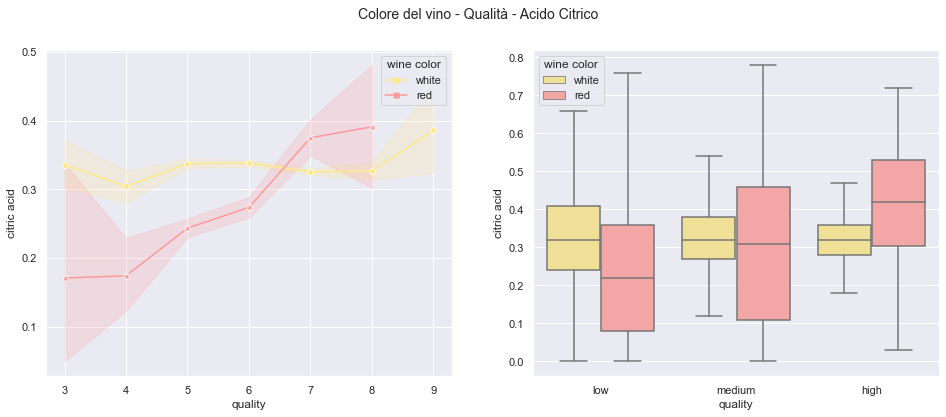

In [185]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Colore del vino - Qualità - Acido Citrico', fontsize=14)

sns.lineplot(x="quality", y="citric acid", markers=True, dashes=False, data=df_wines, style="wine color", 
             hue='wine color', ax=ax1, palette=palette_red_white)

sns.boxplot(x="quality description", y="citric acid", hue="wine color", data=df_wines, showfliers = False,
               palette=palette_red_white, ax=ax2)
ax2.set_xlabel("quality")

plt.show()

***

*Notiamo che in generale maggiore è la quantità di acidio citrico e maggiore sarà la qualità del vino. Ma a dire il vero nel vino bianco l'influenza è abbastanza piatta, l'evidenza viene fuori studiando il vino di colore rosso. Questo perchè l'acido citrico aiuta il processo di fermentazione e donerà al vino freschezza. Quindi, in media, per un vino rosso di buona qualità il livello ottimale sarebbe compreso tra 0,30 e 0,42.*

**Verifica rapporto *Volatile Acidity / Qualità***

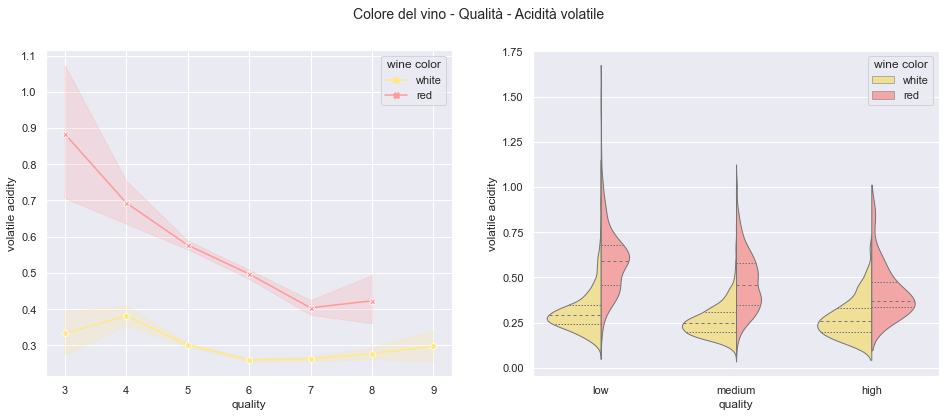

In [187]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Colore del vino - Qualità - Acidità volatile', fontsize=14)

sns.lineplot(x="quality", y="volatile acidity", markers=True, dashes=False, data=df_wines, style="wine color", 
             hue='wine color', ax=ax1, palette=palette_red_white)

sns.violinplot(x="quality description", y="volatile acidity", hue="wine color", data=df_wines, split=True, 
               inner="quartile", linewidth=1, palette=palette_red_white, ax=ax2)
ax2.set_xlabel("quality")

plt.show()

***

*Si noti che in generale in maggiori quantità è presente l'acidità volatile e minore sarà la qualità del vino. Ma a dire il vero nel vino bianco l'influenza è abbastanza piatta, l'evidenza viene fuori studiando il vino di colore rosso. Questo perchè la principale componente dell'acido valotaile è l'acido acetico (associato all'odore e al gusto dell'aceto), in grandi quantità può fornire un gusto sgradevole al vino. Prendendo in considerazione l'analisi si può dire che il livello ottimale, per un vino rosso di buona qualità, sarebbe compreso tra 0,4 e 0,6.*

**Verifica rapporto *Cloruri / Qualità***

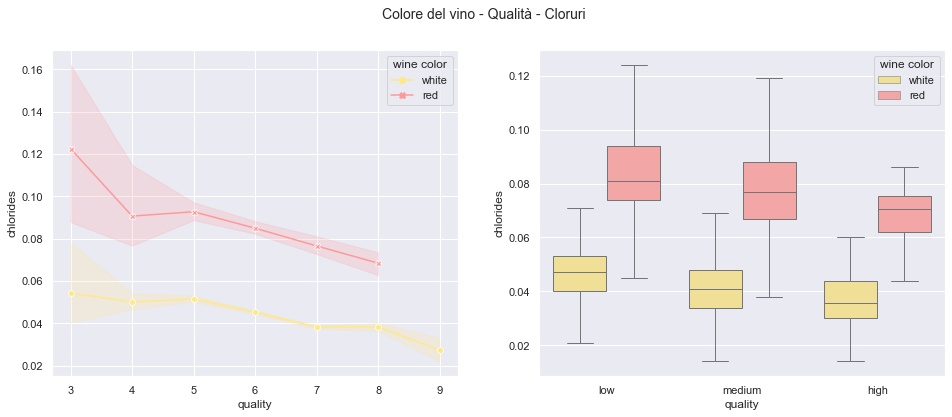

In [188]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Colore del vino - Qualità - Cloruri', fontsize=14)

sns.lineplot(x="quality", y="chlorides", markers=True, dashes=False, data=df_wines, style="wine color", 
             hue='wine color', ax=ax1, palette=palette_red_white)

sns.boxplot(x="quality description", y="chlorides", hue="wine color", data=df_wines, showfliers = False, 
            linewidth=1, palette=palette_red_white, ax=ax2)
ax2.set_xlabel("quality")

plt.show()

***

*Notiamo che in generale in maggiori quantità è presente l'acidità volatile e minore sarà la qualità del vino sia nei vini rossi che nei bianchi. I vini bianchi contengono meno sali minerali dei vini rossi. Quindi un vino di buona qualità contiene meno sale.*

**Verifica rapporto *Density-Alcohol-Quality* (in 4 dimensioni)**

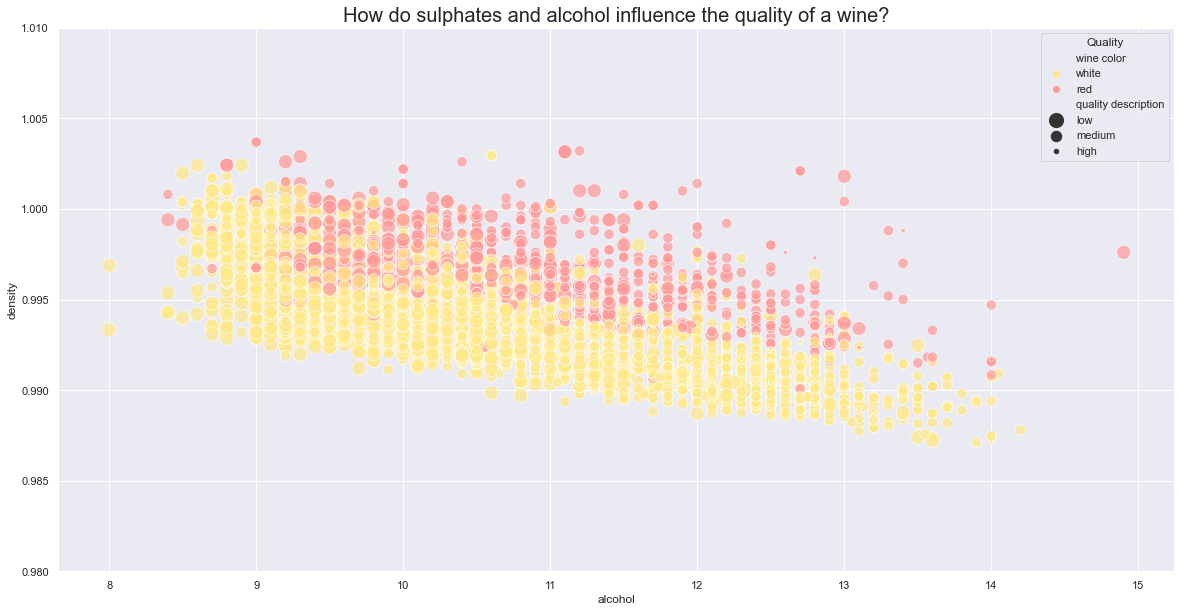

In [175]:
plt.figure(figsize = (20,10))
minsize = 40 * min(df_wines['quality'])
maxsize = 40 * max(df_wines['quality'])
ax = sns.scatterplot(x = "alcohol", y = "density", hue = "wine color", data = df_wines, alpha = 0.7, palette = palette_red_white, size=df_wines['quality description'], sizes=(20, 200))
#ax.set_xlim(left=0, right=30)
ax.set_ylim(bottom=0.98, top=1.01);
ax.set_title("How do sulphates and alcohol influence the quality of a wine?", size = 20)
#ax.set(xlabel="Sulphates", ylabel="Alcohol")
ax.legend(title="Quality");

***

*Si è già appurato che la presenza di elevate quantità di alcohol influenza positivamente la qualità del vino. Analizzando l'influenza della densità sulla qualità si noti che maggiore è la densità e minore sarà la qualità del vino. Questo potrebbe essere dovuto all'aggiunta di altri ingredienti nel vino per migliorare la qualità e questi ingredienti supplementari potrebbero far diminuire la densità del liquido.*

*Inoltre, studiando il grafico anche in base al colore del vino, si può notre che vini rossi hanno maggiore densità dei vini bianchi.*

### Analisi sull'anidride solforosa
L'anidride solforosa agisce come antiossidante ma, in grandi quantità, può essere tossica per l'uomo. La normativa europea pone i limiti massimi per anidride solforosa di 160 mg/lt per i rossi e di 210 mg/lt per i bianchi, con deroghe che permettono allo Stato membro di elevare il valore massimo di 40 mg/lt in annate sfavorevoli.
Quindi 210 per i rossi e 260 per i bianchi. I vino Rossi hanno bisogno di meno anidride solforosa perchè sono già naturalmente protetti dalle ossidazioni dall'azione di componenti presenti nelle bucce delle uve a bacca rossa.

<a href="https://winenews.it/it/troppa-anidride-solforosa-rovina-gli-aromi-dei-vini_319809/" target="_blank">fonte</a>

Media anidride solforosa in base al colore del vino:
wine color
red       46.467792
white    138.360657
Name: total sulfur dioxide, dtype: float64

Numero di vini che non rispettano le leggi: 12


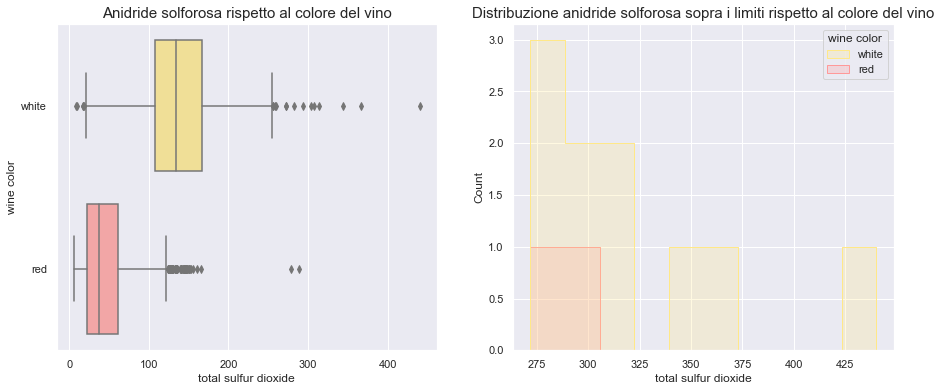

In [173]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,6), squeeze=False)

print('Media anidride solforosa in base al colore del vino:')
print(df_wines.groupby('wine color')['total sulfur dioxide'].mean())

condition_over_limit = ((df_wines['total sulfur dioxide'] > 210) & (df_wines['wine color'] == 'red')) | ((df_wines['total sulfur dioxide'] > 260) & (df_wines['wine color'] == 'white'))
print()
sulfur_dioxide_over_limit = df_wines[condition_over_limit]
print('Numero di vini che non rispettano le leggi:', len(sulfur_dioxide_over_limit))

box=ax[0][0]
sns.boxplot(x='total sulfur dioxide', y='wine color', data=df_wines, palette=palette_red_white, ax=box)
box.set_title('Anidride solforosa rispetto al colore del vino', fontsize=15)

bar=ax[0][1]
sns.histplot(x='total sulfur dioxide', data=sulfur_dioxide_over_limit, hue='wine color', ax=bar, bins=10, palette=palette_red_white, element="step")
bar.set_title('Distribuzione anidride solforosa sopra i limiti rispetto al colore del vino', fontsize=15)

plt.show()

***

*Notiamo che i vini bianchi contengono più anidride solforosa e in media vengono rispettate le leggi Europee sui limiti, ma 12 casi su 6496 non rientrano nei limiti (potrebbero essere outliers)*

### Analisi del pH
La maggior parte dei vini ha un valore di pH compreso tra 3.0 e 4.0. I vini bianchi tendono ad avere valori di pH tra pH 3.0 e 3.3, mentre un pH più alto, valori compresi tra 3,3 e 3,5, sono più comuni per i rossi.
I vini rossi tendono ad avere un pH più alto, in parte, a causa del tempo di contatto più lungo con le bucce del mosto.

<a href="https://hanna.it/analisi-del-vino" target="_blank">fonte</a>

Media pH: 3.22

Statistiche vino rosso:
count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

Statistiche vino bianco:
count    4898.000000
mean        3.188267
std         0.151001
min         2.720000
25%         3.090000
50%         3.180000
75%         3.280000
max         3.820000
Name: pH, dtype: float64


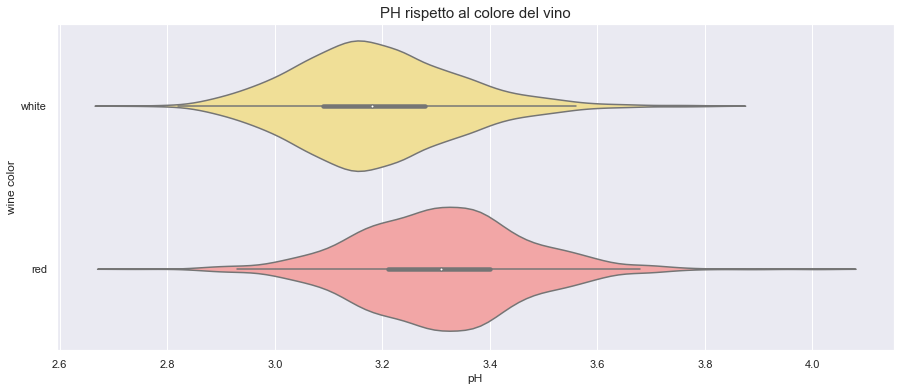

In [213]:
print('Media pH:', round(df_wines['pH'].mean(),2))
print('\nStatistiche vino rosso:')
print(df_wines.loc[df_wines['wine color'] == 'red', 'pH'].describe())
print('\nStatistiche vino bianco:')
print(df_wines.loc[df_wines['wine color'] == 'white', 'pH'].describe())

plt.figure(figsize = (15,6))
ax = sns.violinplot(x='pH', y='wine color', data=df_wines, palette=palette_red_white)
ax.set_title('PH rispetto al colore del vino', fontsize=15)

plt.show()

## Machine Learning